In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
FILE_PATHS = [r'dataset\2020 Annual Campaign - Archived.csv', r'dataset\2021 Annual Campaign - Archived.csv']

In [11]:
df_2020 = pd.read_csv(FILE_PATHS[0])
df_2021 = pd.read_csv(FILE_PATHS[1])

In [12]:
def cleanData(df):
    df.fillna('Unknown', inplace=True)
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [13]:
df_2020.drop(axis=1, columns=['Unnamed: 18'], inplace=True) # Again, no idea why this column exists
df_2021.drop(axis=1, columns=['Unnamed: 18'], inplace=True)
cleanData(df_2020)
cleanData(df_2021)

In [14]:
df_2020_companies = df_2020[df_2020['Account Type'] == 'Company']
df_2020_companies.head()

,Donation ID,Account ID,Shopping Cart ID,Campaign ID,Donation Amount,Donation Date,Account Type,Full Name (F),Company Name,City,Address Line 1,State/Province,Zip Code,Campaign Name,Purpose,Fund,Tender Type,Tribute Full Name (F)
3,168,183,201,3,7.45,02/21/2020,Company,Unknown,Amazon,Unknown,Unknown,Unknown,Unknown,2020 Annual Campaign,General Operating,Unrestricted,Wire Transfer,Unknown
4,357,183,390,3,8.38,08/13/2020,Company,Unknown,Amazon,Unknown,Unknown,Unknown,Unknown,2020 Annual Campaign,General Operating,Unrestricted,Check,Unknown
5,265,267,298,3,150.00,05/07/2020,Company,Unknown,American Family Insurance Dreams Foundation,Unknown,Unknown,Unknown,Unknown,2020 Annual Campaign,General Operating,Unrestricted,Check,Unknown
51,156,175,188,3,250.00,02/26/2020,Company,Unknown,C.H. Robinson,Madison,4009 Felland Rd,WI,53718,2020 Annual Campaign,General Operating,Unrestricted,Check,Unknown
106,458,27,491,3,1007.00,10/05/2020,Company,Unknown,Facebook Fundraising,Unknown,Unknown,Unknown,Unknown,2020 Annual Campaign,General Operating,Unrestricted,Check,Unknown


In [15]:
df_2020_companies = df_2020_companies.groupby(
    'Company Name', as_index=False
).agg(
    **{
        'Donation Amount': ('Donation Amount', 'sum'),
        'Donation Count': ('Donation ID', 'count')
    }
).sort_values(by='Donation Amount', ascending=False)

df_2020_companies

,Company Name,Donation Amount,Donation Count
3,Facebook Fundraising,8860.00,11
16,TASC Employee Philanthropy Committee,3500.00,1
7,Longtable Beer Cafe,1460.00,1
13,PayPal Giving Fund,1173.63,2
11,Musgrave Law Office,720.00,1
15,St. Martin's Council of Catholic Women,500.00,1
12,Nordic Consulting Partners,500.00,1
8,M3 Insurance,500.00,1
5,Fidelity Charitable,350.00,2
9,Middleton Outreach Ministry,250.00,1


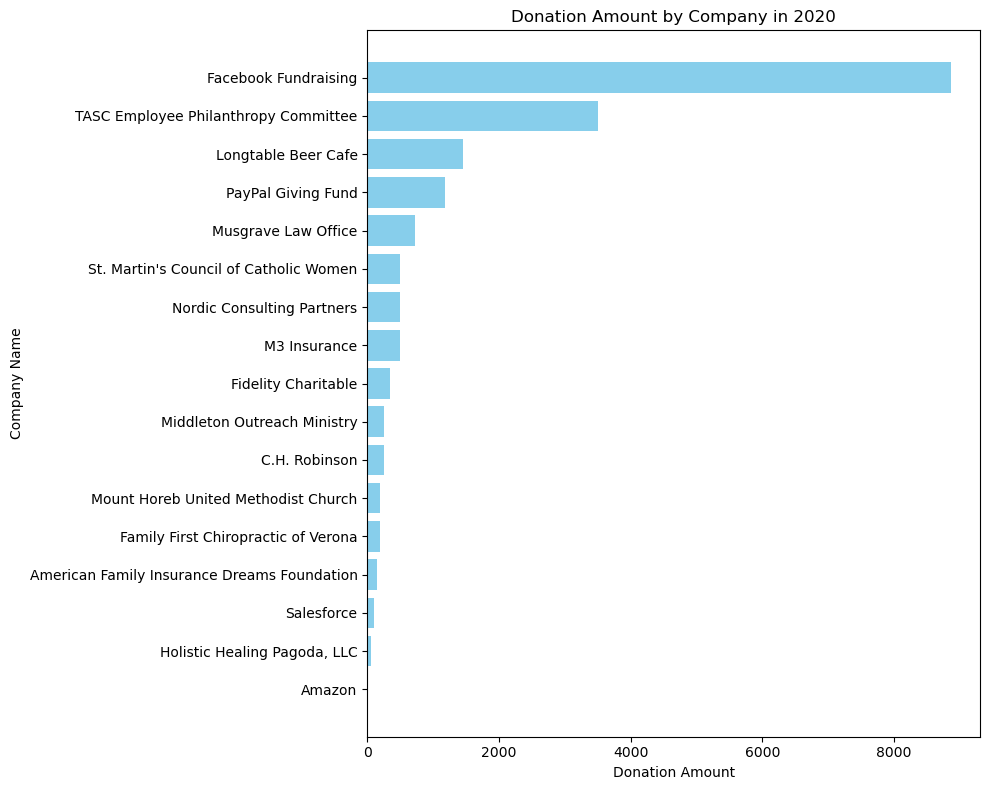

In [16]:
plt.figure(figsize=(10, 8))
plt.barh(df_2020_companies['Company Name'], df_2020_companies['Donation Amount'], color='skyblue')
plt.xlabel('Donation Amount')
plt.ylabel('Company Name')
plt.title('Donation Amount by Company in 2020')
plt.gca().invert_yaxis()  # Reverse the order so the most donation company is at top
plt.tight_layout()
plt.show()